# Pilot Study For State-of-the-art Essay: 
## Evaluating Software Aging Phenomenon In Microservice Systems


### Summary:

Dataset is gotten from static analysis of source code of 5 OSS built on the microservices architecture. This is considered to be an unsupervised ML problem due to the fact that the dataset is unlabeled.

### Step 1: Extract & Clean Datatset
Started by exporting code metric into .docx file. Then, i manually recorded the metrics from the code analysis in a excel file to ease usage.

### Step 2: Loading Datasets & Identifying Features
Loaded the datasets, splitted it into training & testing and checked if there are any missing values or blank spaces. No missing values was found, so I continued to extract the features. After analysing the features, I concluded that the "Project" is just a unique identifier to identify individual entries in the dataset and hence has no impact on the result. Also that the "language(s)" has already been covered by "no_of_languages". 

#### NB: Scaling reduce the score of the evaluation of metrics.

### Step 3: Filtering Relevant Features Via Visualization
Plotted histogram & scatter graph from dataset, i found out that all the features spread across both classes of the result and hence are relevant.

### Step 4: Choose Classifer For Unsupervised Learning
#### Clustering:
- KMeans

Choose KMeans because it is very fast (one of the fastest clustering algorithms available) for unsupervised learning & there are available metrics to evalute its performance. Due to lack of resource, only one algorithm was used in this pilot study.

### Step 5: Parameter Optimization Using Metrics to Identifying Best Combination
To make up for the lack of multiple algorithms, parameter optimization using evalution metrics was used.
#### Metrics
- Calinski-Harabasz: Higher Calinski-Harabasz score relates to a model with better defined clusters.
- Silhouette Coefficient: Score is bounded between -1 & +1. The closer to +1 the better.
- Davies-Bouldin Index: Zero is the lowest possible score. Values closer to zero indicate a better partition.

For each combination of paramater considered, the clustering performance was measured using the above evaluation metrics. The combination with the best score for each evaluation metrics was shortlisted.

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as pyplot
import pandas
import seaborn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
dataset = pandas.read_excel('analysis-complication.xlsx')
dataset

,project,(min) cyclomatic_complexity,(max) cyclomatic_complexity,(min) cognitive_complexity,(max) cognitive_complexity,(min) line_of_code_per_file,(max) line_of_code_per_file,(min) % comment_density,(max) % comment_density,(min) coverage,(max) coverage,(min) % duplication,(max) % duplication,years,no_of_languages,language(s)
0,nytimes-gizmo,0,536,0,424,1,3615,0.0,97.5,0,0,0,99.0,4,1,Go
1,nsqio-nsq,0,1088,0,1059,4,7802,0.0,46.4,0,0,0,62.1,7,5,"CSS, Go, JS, Python, HTML,"
2,magda-io-magda,0,28151,0,34479,0,124788,0.0,96.2,0,0,0,99.6,3,8,"CSS, Java, JS, PHP, Python, Scala, HTML, XML"
3,netflix-genie,0,1948,0,1224,1,22481,1.9,75.0,0,100,0,63.7,6,1,Java
4,ctripcorp-apollo,0,1666,0,785,1,10922,0.0,79.9,0,0,0,85.1,3,2,"Java, XML"


In [25]:
dataset.isnull().values.any()

False

In [41]:
# 40% for test size
X = dataset.iloc[:,1:-1]
training_x_p, testing_x_p = train_test_split(dataset.iloc[:,:-1], test_size=.4, random_state=42)
training_x = training_x_p.iloc[:,1:]
testing_x = testing_x_p.iloc[:,1:]
X

,(min) cyclomatic_complexity,(max) cyclomatic_complexity,(min) cognitive_complexity,(max) cognitive_complexity,(min) line_of_code_per_file,(max) line_of_code_per_file,(min) % comment_density,(max) % comment_density,(min) coverage,(max) coverage,(min) % duplication,(max) % duplication,years,no_of_languages
0,0,536,0,424,1,3615,0.0,97.5,0,0,0,99.0,4,1
1,0,1088,0,1059,4,7802,0.0,46.4,0,0,0,62.1,7,5
2,0,28151,0,34479,0,124788,0.0,96.2,0,0,0,99.6,3,8
3,0,1948,0,1224,1,22481,1.9,75.0,0,100,0,63.7,6,1
4,0,1666,0,785,1,10922,0.0,79.9,0,0,0,85.1,3,2


In [43]:
training_x

,(min) cyclomatic_complexity,(max) cyclomatic_complexity,(min) cognitive_complexity,(max) cognitive_complexity,(min) line_of_code_per_file,(max) line_of_code_per_file,(min) % comment_density,(max) % comment_density,(min) coverage,(max) coverage,(min) % duplication,(max) % duplication,years,no_of_languages
2,0,28151,0,34479,0,124788,0.0,96.2,0,0,0,99.6,3,8
0,0,536,0,424,1,3615,0.0,97.5,0,0,0,99.0,4,1
3,0,1948,0,1224,1,22481,1.9,75.0,0,100,0,63.7,6,1


In [238]:
testing_x

,(min) cyclomatic_complexity,(max) cyclomatic_complexity,(min) cognitive_complexity,(max) cognitive_complexity,(min) line_of_code_per_file,(max) line_of_code_per_file,(min) % comment_density,(max) % comment_density,(min) coverage,(max) coverage,(min) % duplication,(max) % duplication,years,no_of_languages
1,0,1088,0,1059,4,7802,0.0,46.4,0,0,0,62.1,7,5
4,0,1666,0,785,1,10922,0.0,79.9,0,0,0,85.1,3,2


In [254]:
# s=10
# pyplot.scatter(testing_x.iloc[:,1], testing_x.iloc[:,2], s = s)
# pyplot.scatter(testing_x.iloc[:,1], testing_x.iloc[:,3], s = s)
# pyplot.scatter(testing_x.iloc[:,2], testing_x.iloc[:,1], s = s)
# pyplot.scatter(testing_x.iloc[:,2], testing_x.iloc[:,3], s = s)
# pyplot.scatter(testing_x.iloc[:,3], testing_x.iloc[:,1], s = s)
# pyplot.scatter(testing_x.iloc[:,3], testing_x.iloc[:,2], s = s)

In [255]:
def draw_hist(i):
    sample = X.iloc[:,i]
    pyplot.hist(sample)
    pyplot.xlim(0, sample.max())
    pyplot.ylabel("no of oss")
    pyplot.xlabel(list(X)[1])

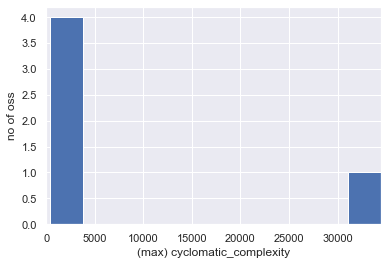

In [241]:
draw_hist(3)

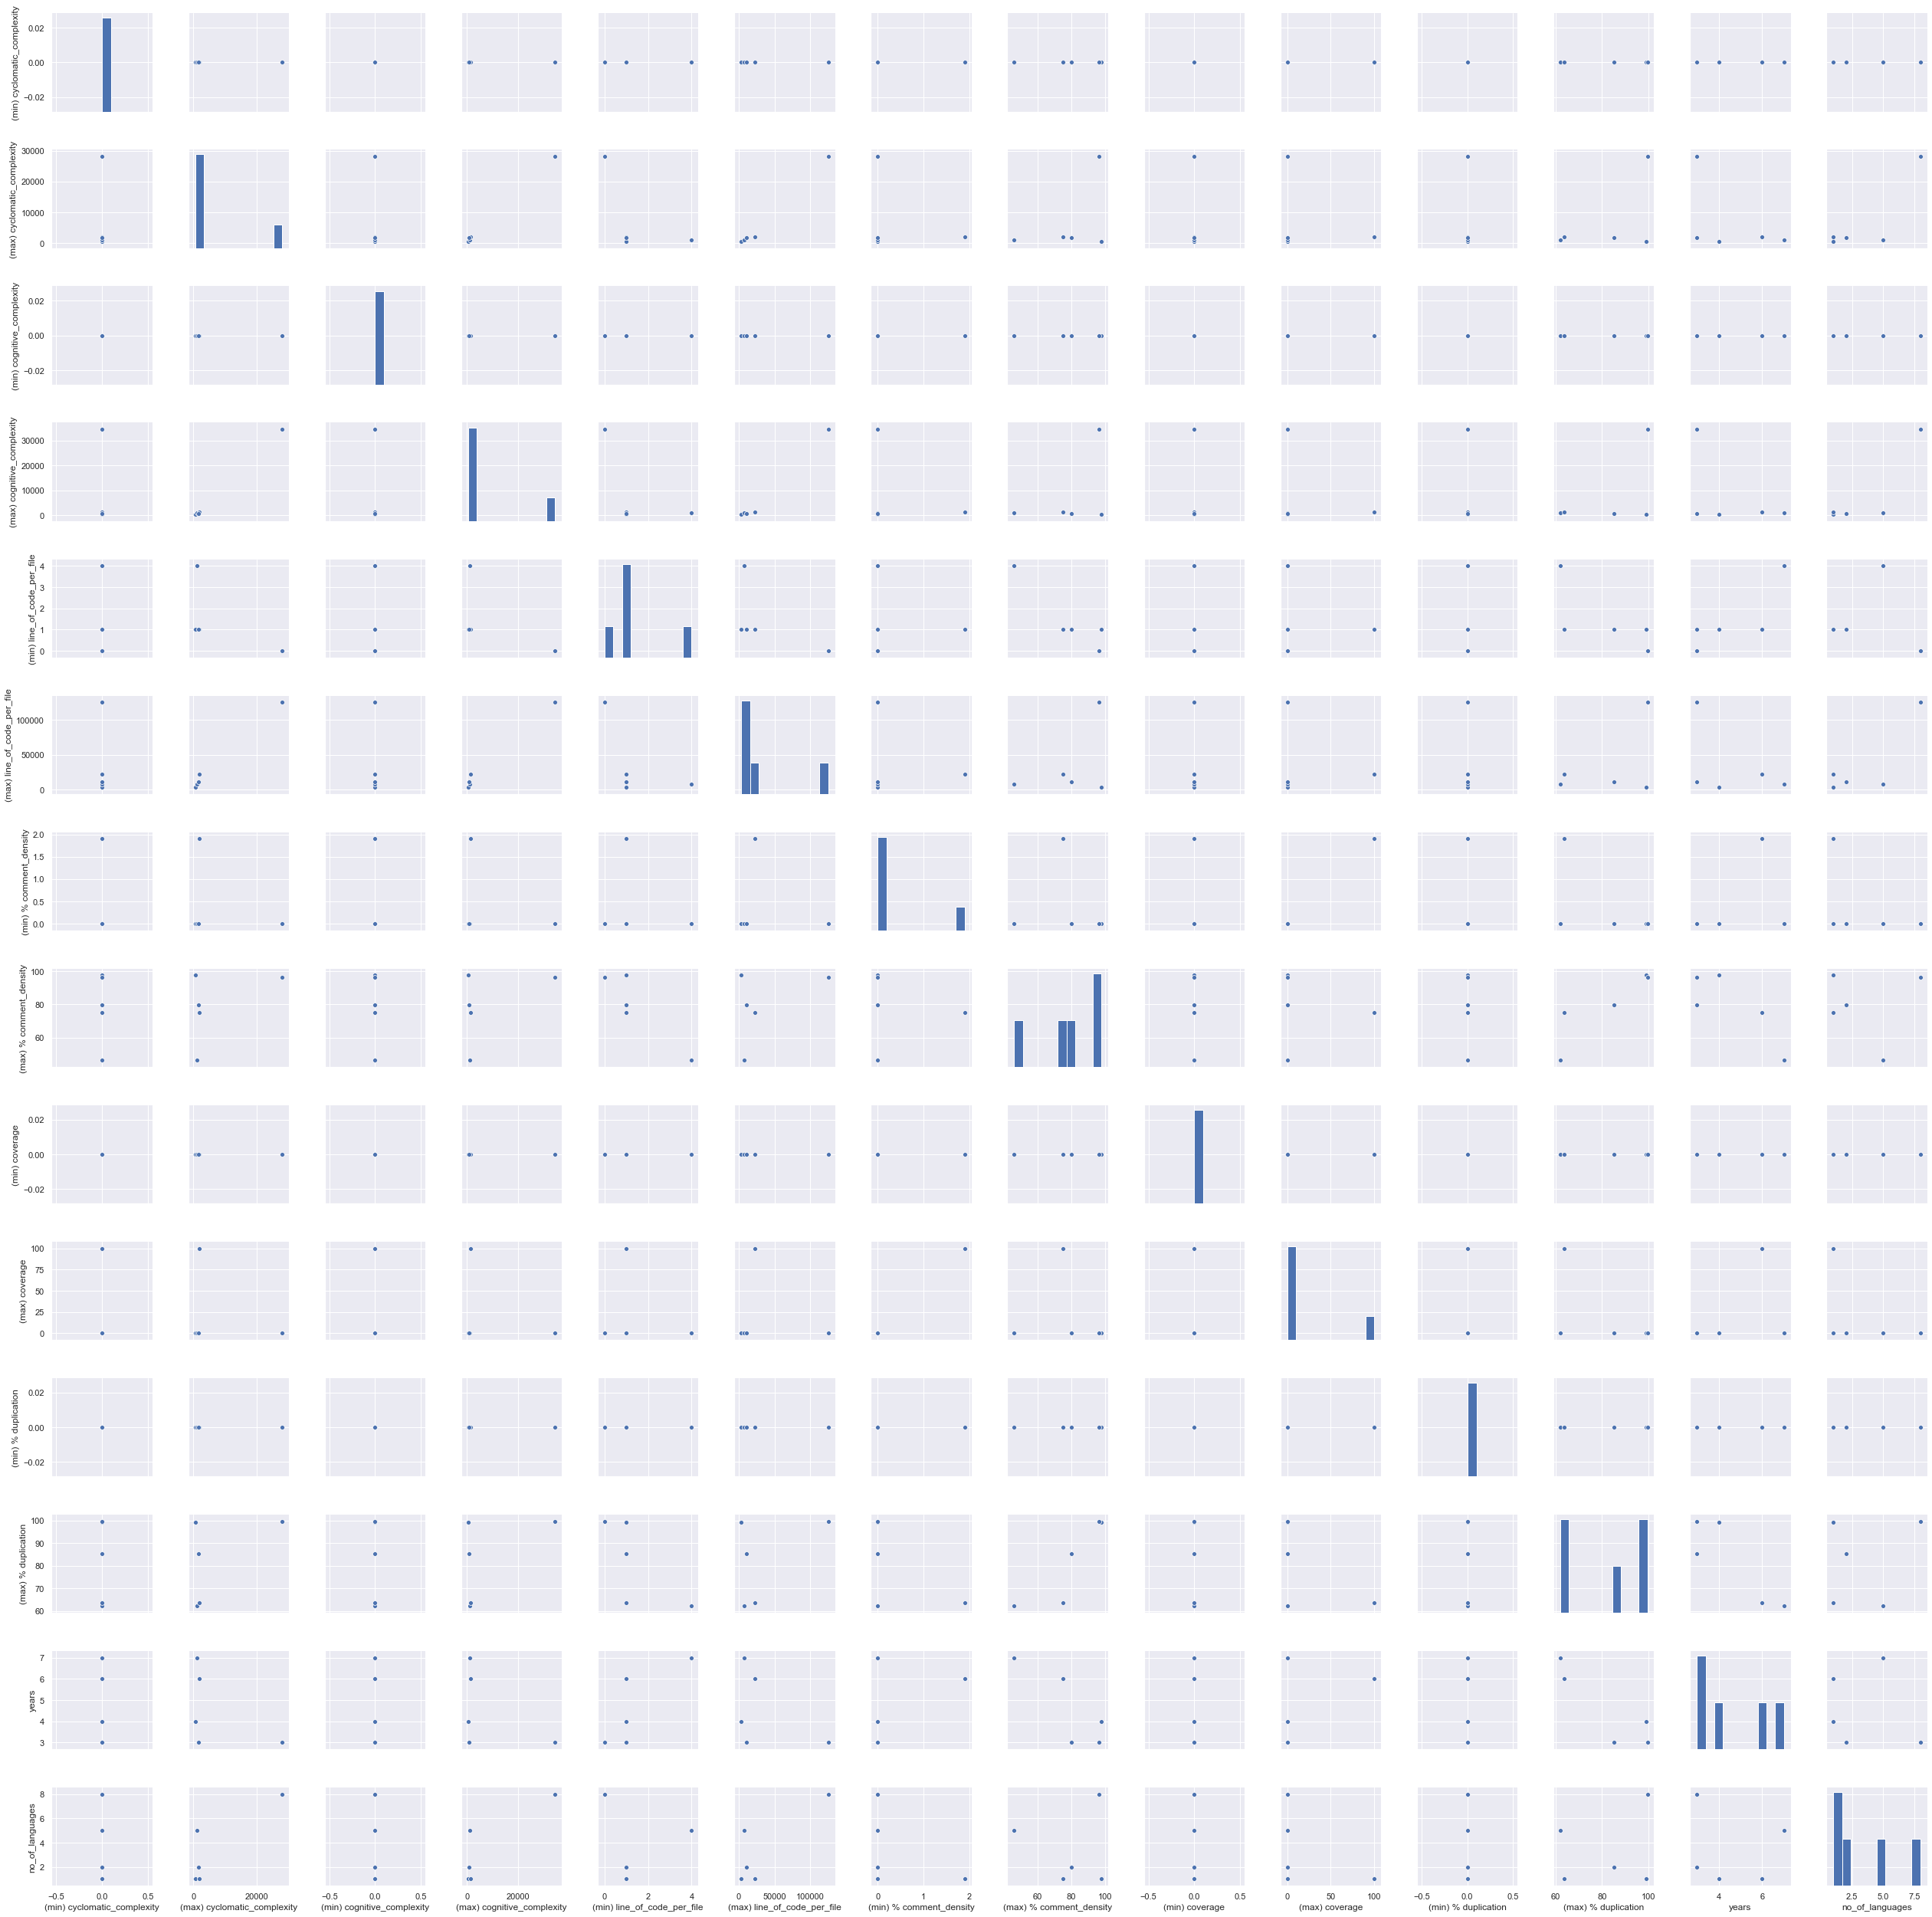

In [242]:
# correlation btw features
seaborn.set()
cols = list(X)
seaborn.pairplot(X[cols], height = 2.5)
pyplot.show();

In [26]:
# n_samples=5 should be >= n_clusters=6
def use_model(X, metric, n_clusters, init, n_init):
    model = KMeans(n_clusters=n_clusters, random_state=1, init=init, n_init=n_init).fit(X)
    labels = model.labels_
    score = metric(X, labels)
    return {"score": score, "metric": metric, "n_clusters": n_clusters, "init": init, "n_init": n_init}

def use_model_ss(X, metric, n_clusters, init, n_init):
    model = KMeans(n_clusters=n_clusters, random_state=1, init=init, n_init=n_init).fit(X)
    labels = model.labels_
    score = metric(X, labels, metric='euclidean')
    return {"score": score, "metric": metric, "n_clusters": n_clusters, "init": init, "n_init": n_init}

In [27]:
def get_result(X, func, metric):
    best_result = {"score": 0}
    for init in ["k-means++", "random"]:
        for n_clusters in [2]:
            for n_init in range(4,8):
                result = func(X, metric, n_clusters, init, n_init)
                if metric.__name__ == "davies_bouldin_score":
                    best_result["score"] = 1e100
                    if result["score"] < best_result["score"]:
                        best_result = result
                elif result["score"] > best_result["score"]:
                    best_result = result
    print(best_result)


In [28]:
# scalerX= StandardScaler().fit(training_x)
# scalerX.fit(training_x)
# training_x = scalerX.transform(training_x)
# training_x

In [29]:
get_result(training_x, use_model_ss, metrics.silhouette_score)

{'score': 0.5606758964377025, 'metric': <function silhouette_score at 0x11d7b3598>, 'n_clusters': 2, 'init': 'k-means++', 'n_init': 4}


In [30]:
get_result(training_x, use_model, metrics.calinski_harabasz_score)

{'score': 53.332312597578046, 'metric': <function calinski_harabasz_score at 0x11d7b3730>, 'n_clusters': 2, 'init': 'k-means++', 'n_init': 4}


In [31]:
get_result(training_x, use_model, metrics.davies_bouldin_score)

{'score': 0.07905769804238358, 'metric': <function davies_bouldin_score at 0x11d7b38c8>, 'n_clusters': 2, 'init': 'random', 'n_init': 7}


In [32]:
model = KMeans(n_clusters=2, random_state=1, init="k-means++", n_init=4).fit(training_x)
labels = model.labels_
labels

array([1, 0, 0], dtype=int32)

In [33]:
cluster_center = model.cluster_centers_
cluster_center

array([[0.00000e+00, 1.24200e+03, 0.00000e+00, 8.24000e+02, 1.00000e+00,
        1.30480e+04, 9.50000e-01, 8.62500e+01, 0.00000e+00, 5.00000e+01,
        0.00000e+00, 8.13500e+01, 5.00000e+00, 1.00000e+00],
       [0.00000e+00, 2.81510e+04, 0.00000e+00, 3.44790e+04, 0.00000e+00,
        1.24788e+05, 0.00000e+00, 9.62000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 9.96000e+01, 3.00000e+00, 8.00000e+00]])

In [52]:
training_prediction = model.predict(training_x)
Prediction = pandas.DataFrame()
Prediction.insert(0, 'Id', training_x_p.iloc[:,0].values.astype(str))
Prediction.insert(1, 'Category', training_prediction.astype(int))
print(f"Training Predictions \n{Prediction}")

Training Predictions 
               Id  Category
0  magda-io-magda         1
1   nytimes-gizmo         0
2   netflix-genie         0


In [49]:
testing_prediction = model.predict(testing_x)
Prediction = pandas.DataFrame()
Prediction.insert(0, 'Id', testing_x_p.iloc[:,0].values.astype(str))
Prediction.insert(1, 'Category', testing_prediction.astype(int))
print(f"Testing Predictions \n{Prediction}")

Testing Predictions 
                 Id  Category
0         nsqio-nsq         0
1  ctripcorp-apollo         0
